In [2]:
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

import graphviz 
from sklearn import tree

print(sklearn.__version__)
print(pd.__version__)

0.23.1
1.0.5


## Load data

In [3]:
boston_dict=load_boston()
data = boston_dict['data']
target = boston_dict['target']
feature_names = boston_dict['feature_names']
info = boston_dict['DESCR']
print(info)
df = pd.DataFrame(data=data, columns=[feature_names])
df['ONE'] = 1
df['PRICE'] = np.array(target) 
display(df.head())
#display(df['ONE'])

X = df[feature_names].copy()
X['ONE'] = 1
X = X.values
#X = X/X.max(axis=0)


y=target
std=y.std()

y_max=max(y)
y_min=min(y)
y_mean=y.mean()

y=(y-y_mean)/std

#y=y/std

y=np.array(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 11)

n_train=X_train.shape[0]
n_test=X_test.shape[0]
m=X_train.shape[1]
print(n_train, n_test, m)
del df['PRICE']
df['PRICE'] = np.array(y)
display(df.head(5))
feature_names_one=list(feature_names) + ["ONE"]
df_train=pd.DataFrame(data=X_train, columns=[feature_names_one])
df_train['PRICE'] = y_train

display(df_train.head())

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ONE,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,1,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,1,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,1,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,1,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,1,36.2


404 102 14


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ONE,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,1,0.159686
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,1,-0.101524
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,1,1.324247
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,1,1.182758
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,1,1.487503


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ONE,PRICE
0,0.12579,45.0,3.44,0.0,0.437,6.556,29.1,4.5667,5.0,398.0,15.2,382.84,4.56,1.0,0.790943
1,0.47547,0.0,9.90,0.0,0.544,6.113,58.8,4.0019,4.0,304.0,18.4,396.23,12.73,1.0,-0.166827
2,0.85204,0.0,8.14,0.0,0.538,5.965,89.2,4.0123,4.0,307.0,21.0,392.53,13.83,1.0,-0.319199
3,0.63796,0.0,8.14,0.0,0.538,6.096,84.5,4.4619,4.0,307.0,21.0,380.02,10.26,1.0,-0.471572
4,5.66998,0.0,18.10,1.0,0.631,6.683,96.8,1.3567,24.0,666.0,20.2,375.33,3.73,1.0,2.989460


# XGB Tree

In [3]:
class SplitResult():
    similarity=0
    similarity_gain=0
    i_feature=-1
    split_value=None
    split_quantile=0
    # left
    left_X=None
    left_y=None
    left_similarity=0
    left_n=0
    # right
    left_X=None
    left_y=None
    right_similarity=0
    right_n=0
    
class Branch:
    no=0
    depth=1
    i_feature=-1
    split_value=0
    split_quantile=0
    similarity=0
    similarity_gain=0
    n_samples=0
    value=[]
    X=None
    y=None
    
    
    left_branch=None
    right_branch=None
    
    def value(self, _lambda):
        
        return np.sum(self.y)/(len(self.y)+_lambda)

    
    def is_leaf(self):
        return self.left_branch is None and self.right_branch is None

In [6]:
from sklearn.metrics import r2_score
class XGBTree():
    
    _lambda=1
    node_number=0
    the_tree=None
    max_depth=3
    gamma=2
    colsample_bynode=1.0
    
    def __init__(self, max_depth=3, _lambda=1, gamma=2, colsample_bynode=1.0):
        
        self.max_depth = max_depth
        self._lambda =_lambda
        self.gamma = gamma
        self.colsample_bynode = colsample_bynode

    def get_similarity(self, a):
        a=np.array(a)
        n=len(a)
        #print(a)
        sim=a.sum()**2/(n+self._lambda)

        return sim
    
    def get_colsample_bynode_indics(self, n_features):
        if n_features==1:
            return [1]

        if self.colsample_bynode>1:
            raise ValueError("colsample_bynode must be smaller than or equal to 1.0")

        n_selected_features=int(self.colsample_bynode * n_features)
        if n_selected_features==n_features:
            return list(range(n_features))


        old_list=list(range(n_features))
        new_list=[]
        for i in range(n_selected_features):
            selected = random.choice(old_list)
            while selected in new_list:
                selected = random.choice(old_list)
            new_list.append(selected)
        return new_list
    
    def find_best_split(self, X, y):
        n_features=X.shape[1]
        best_sr=SplitResult()
        # colsample_bynode
        selected_features = self.get_colsample_bynode_indics(n_features)
        for i_feature in selected_features:
            f=X[:,i_feature]
            # Approximate Algorithm 
            # Instead of Basic Exact Greedy Algorithm
            quantiles = np.quantile(f, [.25,.5,.75]) 
            for split_valie, split_quantile in zip(quantiles, [.25,.5,.75]):
                sr = SplitResult()
                sr.i_feature=i_feature
                condition = f<split_valie
                #print(condition)
                # left
                sr.left_y = y[condition]
                sr.left_n = len(sr.left_y)
                if sr.left_n == 0:
                    continue
                sr.left_similarity = self.get_similarity(sr.left_y)

                # right
                sr.right_y = y[~condition]
                sr.right_n = len(sr.right_y)
                if sr.right_n == 0:
                    continue
                sr.right_similarity = self.get_similarity(sr.right_y)

                sr.similarity = sr.left_similarity + sr.right_similarity
                #sr.print_me()
                if sr.similarity>best_sr.similarity:
                    best_sr=sr
                    best_sr.left_X = X[condition,:]
                    best_sr.right_X = X[~condition,:]
                    best_sr.split_value = split_valie
                    best_sr.split_quantile = split_quantile
        return best_sr
    

    def fit_inner(self, X, y, depth, branch_similarity):
        branch = Branch()
        branch.no=self.node_number
        self.node_number+=1
        branch.similarity=branch_similarity
        branch.n_samples = len(y)
        branch.X=X
        branch.y=y

        if depth==self.max_depth:
            #print("leaf")

            return branch
        else:
            sr=self.find_best_split(X, y)
            if sr.i_feature==-1:
                return branch

            sr.similarity_gain=sr.similarity-branch_similarity

            #sr.print_me()
            branch.i_feature=sr.i_feature
            branch.split_value = sr.split_value
            branch.split_quantile = sr.split_quantile
            branch.similarity_gain=sr.similarity_gain
            #print("branch")
            branch.left_branch=self.fit_inner(sr.left_X, sr.left_y, depth+1, branch_similarity=sr.left_similarity)
            branch.right_branch=self.fit_inner(sr.right_X, sr.right_y, depth+1, branch_similarity=sr.right_similarity)

            return branch
        
    def fit(self, X, y):
        self.node_number=0
        similarity=self.get_similarity(y)
        self.tree=self.fit_inner(X, y, 0, branch_similarity=similarity)
        
    def prune_inner(self, b: Branch):
        if b.is_leaf():
            return
        self.prune_inner(b.left_branch)
        self.prune_inner(b.right_branch)
        if b.left_branch.is_leaf() and b.right_branch.is_leaf():
            if b.similarity_gain<self.gamma:
                b.left_branch=None
                b.right_branch=None
        
    def prune(self):
        self.prune_inner(self.tree)
        
    def predict_one_inner(self, tree:Branch, x):
        if tree.is_leaf():
            return tree.value()
        if x[tree.i_feature]<tree.split_value:
            return self.predict_one_inner(tree.left_branch, x)
        else:
            return self.predict_one_inner(tree.right_branch, x)

    def predict_inner(self, tree:Branch, X):
        y=[]
        for x in X:
            t=self.predict_one_inner(tree, x)
            y.append(t)
        return np.array(y)

    def predict(self, X):
        return self.predict_inner(self.tree, X)
    
    def score(self, X, y):
        y_hat = self.predict(X)
        return r2_score(y, y_hat)

    def export_graphviz_inner(self, the_branch:Branch, dot_data:str):
        fillcolor = "#ffffff"
        if the_branch.similarity_gain < self.gamma:
            fillcolor = "#ffaaaa"
        if the_branch.similarity_gain < 0:
            fillcolor = "#ff4444"

        if the_branch.is_leaf():
            n_positive = sum(the_branch.y>=0)
            n_negative = sum(the_branch.y<0)
            dot_data += f"{the_branch.no} [label=\"{the_branch.no}\n"+ \
            f"samples={the_branch.n_samples:0.0f}\\n" + \
            f"+/- = {n_positive}/{n_negative}\\n" + \
            f"value={the_branch.value():0.3f}\\n" + \
            f"\", fillcolor=\"#22ee22\"];"
        else:
            dot_data += f"{the_branch.no} [label=\"{the_branch.no}\n"+ \
            f"{feature_names[the_branch.i_feature]} <= {the_branch.split_value:0.3f}\\n" + \
            f"split_quantile = {the_branch.split_quantile:0.2f}\\n" + \
            f"samples = {the_branch.n_samples:0.0f}\\n" + \
            f"sim_gain = {the_branch.similarity_gain:0.3f}\\n" + \
            f"\", fillcolor=\"{fillcolor}\"];"
        #print(branch_str)
        if not the_branch.left_branch is None:
            left_branch=the_branch.left_branch
            if left_branch.no>0:
                dot_data += f"{the_branch.no} -> {left_branch.no} ;"
                dot_data = self.export_graphviz_inner(left_branch, dot_data)
        if not the_branch.right_branch is None:
            right_branch=the_branch.right_branch
            if right_branch.no>0:
                dot_data += f"{the_branch.no} -> {right_branch.no} ;"
                dot_data = self.export_graphviz_inner(right_branch, dot_data)
        return dot_data

    def export_graphviz(self):
        dot_data="""digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n"""
        dot_data+=self.export_graphviz_inner(self.tree, "")
        dot_data+="}"
        dot_data=dot_data.replace("\r\n","\n")
        return dot_data

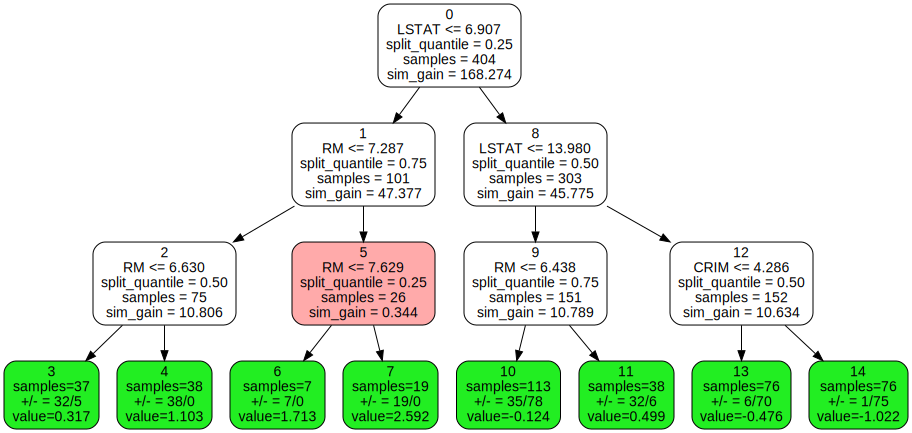

In [7]:
xdt = XGBTree()
xdt.fit(X_train, y_train)
dot_data=xdt.export_graphviz()
graph = graphviz.Source(dot_data) 
display(graph)

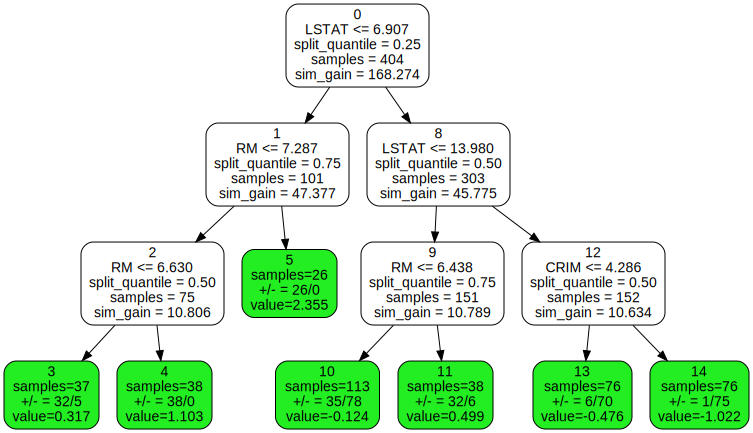

In [8]:
xdt.prune()
dot_data=xdt.export_graphviz()
graph = graphviz.Source(dot_data) 
display(graph)

In [9]:
display(xdt.score(X, y))
display(xdt.score(X_train, y_train))
display(xdt.score(X_test, y_test))

0.7122572081276021

0.7509138990936385

0.5611754222602993

## Step 1 Average

In [10]:
#now let's get started
learning_rate=0.3
loss = [0] * 6
residuals = np.zeros([6,n_train])
predictoin = np.zeros([6,n_train])
#calculation
#average_y=y.mean()
predictoin[0] = [0.5] * n_train
residuals[0] = y_train - predictoin[0]
df_train['$f_0$']=np.array(predictoin[0]).reshape((-1, 1))
df_train['$r_0$']=np.array(residuals[0]).reshape((-1, 1))
display(df)
loss[0] = np.sum(residuals[0] ** 2)
trees = []

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ONE,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,1,0.159686
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,1,-0.101524
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,1,1.324247
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,1,1.182758
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,1,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,1,-0.014454
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,1,-0.210362
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,1,0.148802
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,1,-0.057989


In [11]:
predictoin[0].shape

(404,)

In the first step, we calculate the average 71.2 as the initial prediction. The pseudo residuals are 16.8, 4.8, etc.

## Step 2 For Loop

In [12]:
def iterate(i):
    t = XGBTree(max_depth=3, gamma=5)
    t.fit(X_train,residuals[i])
    trees.append(t)
    
    dot_data = t.export_graphviz()
    graph = graphviz.Source(dot_data) 
    display(graph)
    t.prune()
    dot_data = t.export_graphviz()
    graph = graphviz.Source(dot_data) 
    display(graph)
    #next prediction, residual
    predictoin[i+1]=predictoin[i]+learning_rate * t.predict(X_train)
    residuals[i+1]=y_train-predictoin[i+1]
    loss[i+1] = np.sum(residuals[i+1] ** 2)/n_train
    y_hat=t.predict(X_train)
    df_train[f'$\gamma_{i+1}$']=y_hat.reshape((-1,1))
    df_train[f'$f_{i+1}$']=np.array(predictoin[i+1]).reshape((-1,1))
    df_train[f'$r_{i+1}$']=np.array(residuals[i+1]).reshape((-1,1))
    if i==0:
        display(df_train[[f'$f_{i}$',f'$r_{i}$',f'$\gamma_{i+1}$',f'$f_{i+1}$',f'$r_{i+1}$']])
    else:
        display(df_train[["PRICE",f'$f_{i}$',f'$r_{i}$',f'$\gamma_{i+1}$',f'$f_{i+1}$',f'$r_{i+1}$']])
    

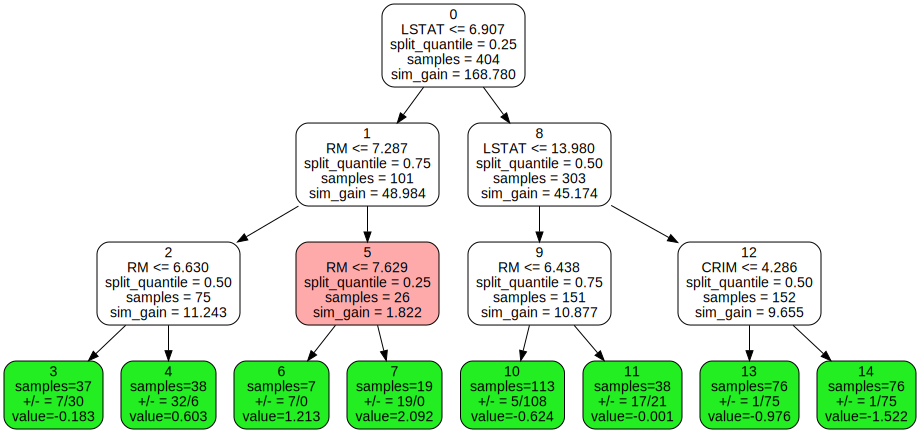

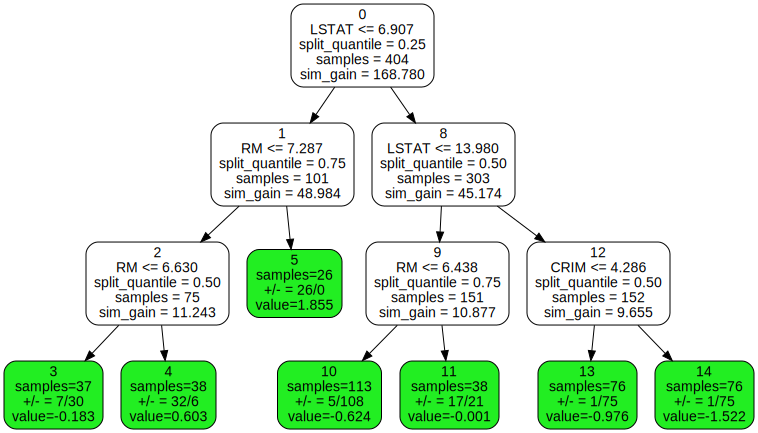

,$f_0$,$r_0$,$\gamma_1$,$f_1$,$r_1$
0,0.5,0.290943,-0.183235,0.445029,0.345914
1,0.5,-0.666827,-0.624448,0.312666,-0.479493
2,0.5,-0.819199,-0.624448,0.312666,-0.631865
3,0.5,-0.971572,-0.624448,0.312666,-0.784237
4,0.5,2.489460,0.602848,0.680854,2.308606
...,...,...,...,...,...
399,0.5,-0.938920,-0.624448,0.312666,-0.751586
400,0.5,-0.557989,-0.624448,0.312666,-0.370655
401,0.5,0.095036,0.602848,0.680854,-0.085819
402,0.5,0.367129,0.602848,0.680854,0.186275


In [13]:
iterate(0)

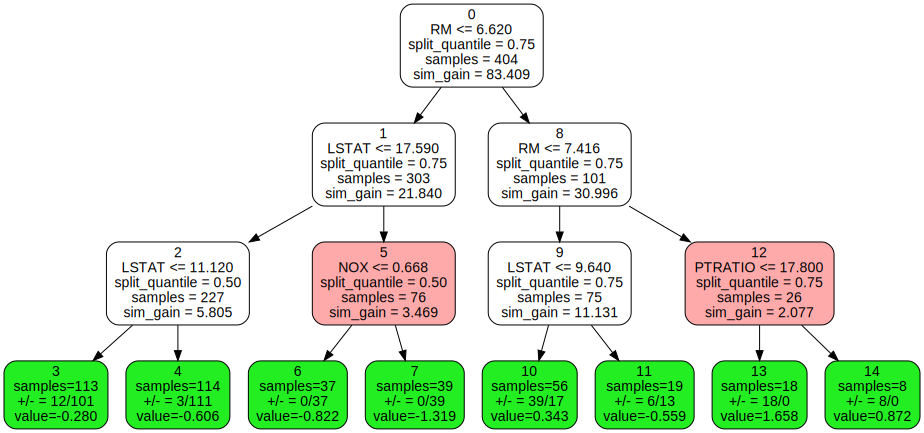

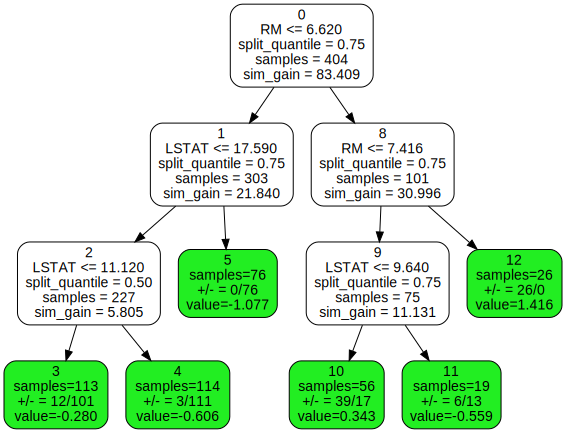

,PRICE,$f_1$,$r_1$,$\gamma_2$,$f_2$,$r_2$
0,0.790943,0.445029,0.345914,-0.279922,0.361053,0.429890
1,-0.166827,0.312666,-0.479493,-0.606451,0.130730,-0.297557
2,-0.319199,0.312666,-0.631865,-0.606451,0.130730,-0.449930
3,-0.471572,0.312666,-0.784237,-0.279922,0.228689,-0.700261
4,2.989460,0.680854,2.308606,0.342607,0.783637,2.205823
...,...,...,...,...,...,...
399,-0.438920,0.312666,-0.751586,-0.279922,0.228689,-0.667610
400,-0.057989,0.312666,-0.370655,-0.279922,0.228689,-0.286678
401,0.595036,0.680854,-0.085819,0.342607,0.783637,-0.188601
402,0.867129,0.680854,0.186275,0.342607,0.783637,0.083493


In [14]:
iterate(1)

In iteration 1, we firstly train a tree using residuals_1. This tree tells us height is also important in determining weight. Whose who are less than 1.55 meters are supported to lose -7.289 and the other to gain 7.289. Again, we want to shrink this to 20%, which is -1.4578 and 1.4578. We then make prediction_2 based on prediction_1 and $\gamma$. We see Alex gains 1.4578 kg because he is 1.6. Others also gain or lose weight because of the new rule.

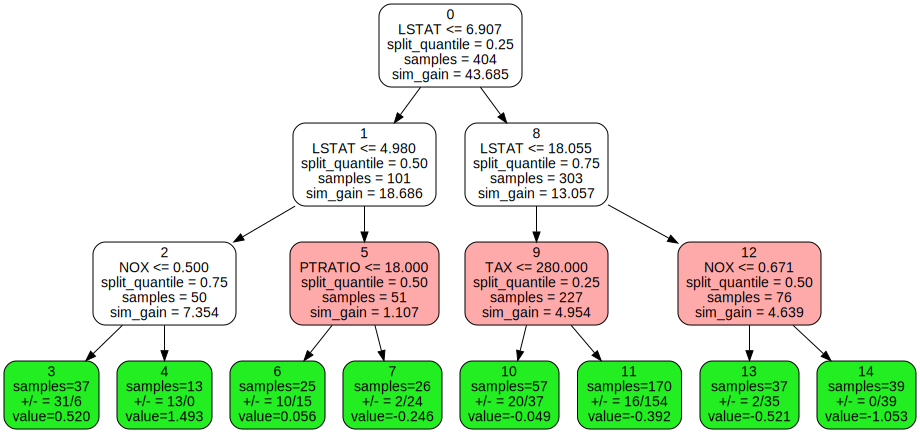

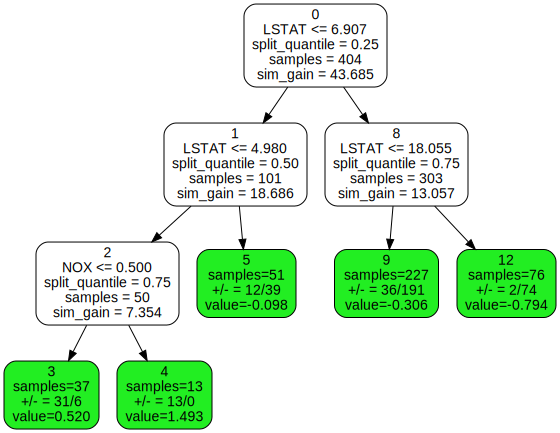

,PRICE,$f_2$,$r_2$,$\gamma_3$,$f_3$,$r_3$
0,0.790943,0.361053,0.429890,0.520445,0.517186,0.273757
1,-0.166827,0.130730,-0.297557,-0.305584,0.039055,-0.205882
2,-0.319199,0.130730,-0.449930,-0.305584,0.039055,-0.358255
3,-0.471572,0.228689,-0.700261,-0.305584,0.137014,-0.608586
4,2.989460,0.783637,2.205823,1.493132,1.231576,1.757884
...,...,...,...,...,...,...
399,-0.438920,0.228689,-0.667610,-0.305584,0.137014,-0.575934
400,-0.057989,0.228689,-0.286678,-0.305584,0.137014,-0.195003
401,0.595036,0.783637,-0.188601,-0.098053,0.754221,-0.159185
402,0.867129,0.783637,0.083493,0.520445,0.939770,-0.072641


In [15]:
iterate(2)

Iteration 2 again tells us that gender matters.

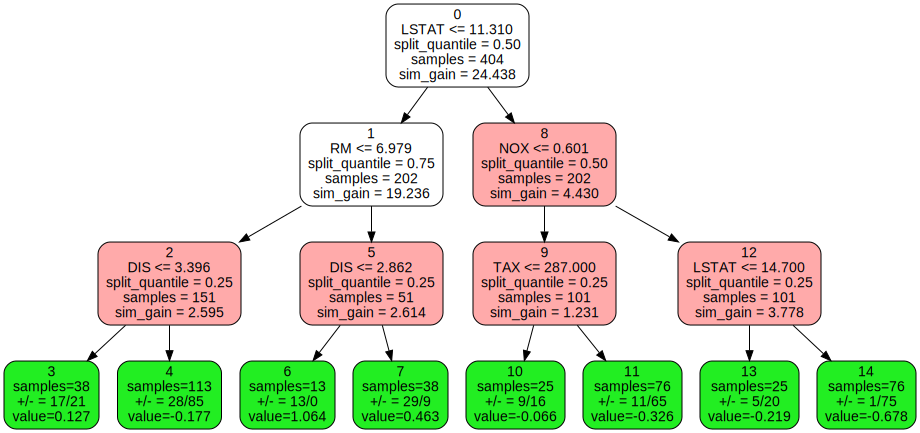

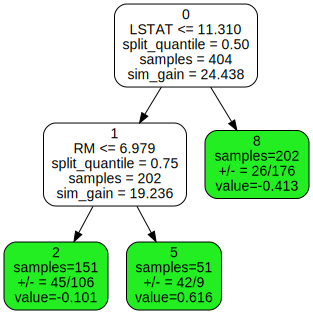

,PRICE,$f_3$,$r_3$,$\gamma_4$,$f_4$,$r_4$
0,0.790943,0.517186,0.273757,-0.100823,0.486939,0.304004
1,-0.166827,0.039055,-0.205882,-0.413125,-0.084882,-0.081945
2,-0.319199,0.039055,-0.358255,-0.413125,-0.084882,-0.234317
3,-0.471572,0.137014,-0.608586,-0.100823,0.106767,-0.578339
4,2.989460,1.231576,1.757884,-0.100823,1.201329,1.788131
...,...,...,...,...,...,...
399,-0.438920,0.137014,-0.575934,-0.100823,0.106767,-0.545687
400,-0.057989,0.137014,-0.195003,-0.100823,0.106767,-0.164756
401,0.595036,0.754221,-0.159185,-0.100823,0.723974,-0.128938
402,0.867129,0.939770,-0.072641,-0.100823,0.909523,-0.042394


In [16]:
iterate(3)

Iteration 3 argues that height is important, too.

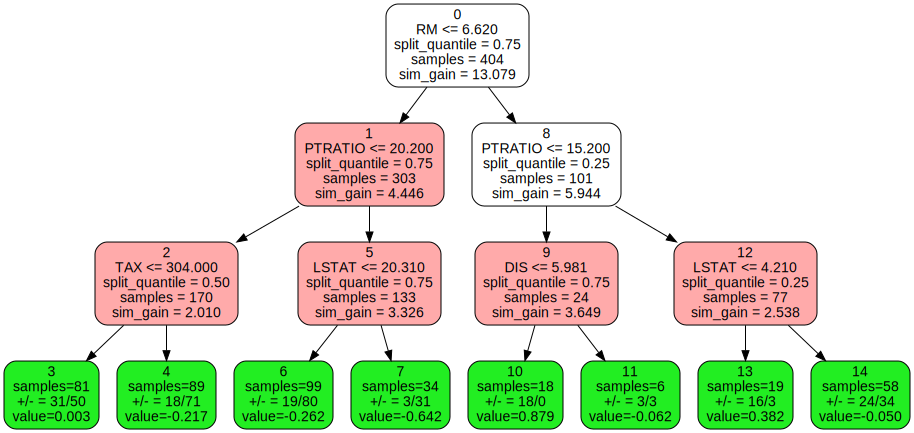

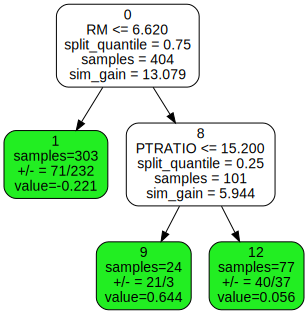

,PRICE,$f_4$,$r_4$,$\gamma_5$,$f_5$,$r_5$
0,0.790943,0.486939,0.304004,-0.220671,0.420738,0.370205
1,-0.166827,-0.084882,-0.081945,-0.220671,-0.151084,-0.015743
2,-0.319199,-0.084882,-0.234317,-0.220671,-0.151084,-0.168116
3,-0.471572,0.106767,-0.578339,-0.220671,0.040566,-0.512137
4,2.989460,1.201329,1.788131,0.056497,1.218278,1.771182
...,...,...,...,...,...,...
399,-0.438920,0.106767,-0.545687,-0.220671,0.040566,-0.479486
400,-0.057989,0.106767,-0.164756,-0.220671,0.040566,-0.098555
401,0.595036,0.723974,-0.128938,0.056497,0.740923,-0.145887
402,0.867129,0.909523,-0.042394,0.056497,0.926472,-0.059343


In [17]:
iterate(4)

Let's stop at Iteration 4. And take a look at the loss.

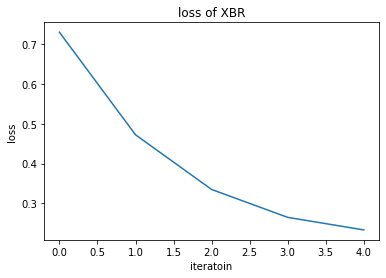

In [18]:
plt.plot(loss[1:])
plt.title('loss of XBR')
plt.xlabel('iteratoin')
plt.ylabel('loss')
plt.show()